In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setting up the working directory

In [2]:
import os
os.chdir('/content/drive/MyDrive/DL/Brain Tumor Detection')

### Import the library

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from sklearn.utils import shuffle
from tqdm.notebook import tqdm

In [4]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = 'data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
images = []
labels = []
image_size = 128
classes = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [6]:
# Processing the data from the training folder
for clas in tqdm(classes):
    folderPath = os.path.join('data/Training',clas)
    for image in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,image))
        img = cv2.resize(img,(image_size,image_size))
        img = np.array(img)
        images.append(img)
        labels.append(classes.index(clas))

  0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
# Processing the data from the testing folder
for clas in tqdm(classes):
    folderPath = os.path.join('data/Testing',clas)
    for image in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,image))
        img = cv2.resize(img,(image_size,image_size))
        img = np.array(img)
        images.append(img)
        labels.append(classes.index(clas))

  0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
images = np.array(images)
labels = np.array(labels)

In [9]:
images,labels = shuffle(images,labels,random_state=101)

In [10]:
images.shape

(3264, 128, 128, 3)

In [11]:
labels.shape

(3264,)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images,labels,test_size=0.2,random_state=42)

In [13]:
print(images.shape, x_train.shape, x_test.shape)

print(labels.shape, y_train.shape, y_test.shape)

(3264, 128, 128, 3) (2611, 128, 128, 3) (653, 128, 128, 3)
(3264,) (2611,) (653,)


### Normalizing the image

In [14]:
X_train = x_train / 255.0

X_test = x_test / 255.0

### Convolutional Neural Network

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from sklearn.metrics import accuracy_score

In [16]:
model = Sequential()

model.add(Conv2D(128,(3,3),activation = 'relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size = 128, validation_data=(X_test, y_test))

Epoch 1/20
21/21 [==============================] - 16s 333ms/step - loss: 1.3626 - accuracy: 0.3922 - val_loss: 1.1693 - val_accuracy: 0.5421
Epoch 2/20
21/21 [==============================] - 4s 198ms/step - loss: 1.0566 - accuracy: 0.5592 - val_loss: 0.9174 - val_accuracy: 0.6141
Epoch 3/20
21/21 [==============================] - 4s 202ms/step - loss: 0.8272 - accuracy: 0.6695 - val_loss: 0.7423 - val_accuracy: 0.6983
Epoch 4/20
21/21 [==============================] - 4s 209ms/step - loss: 0.6531 - accuracy: 0.7354 - val_loss: 0.6023 - val_accuracy: 0.7703
Epoch 5/20
21/21 [==============================] - 4s 207ms/step - loss: 0.5648 - accuracy: 0.7844 - val_loss: 0.7333 - val_accuracy: 0.7213
Epoch 6/20
21/21 [==============================] - 4s 205ms/step - loss: 0.4767 - accuracy: 0.8093 - val_loss: 0.4870 - val_accuracy: 0.8239
Epoch 7/20
21/21 [==============================] - 4s 214ms/step - loss: 0.3781 - accuracy: 0.8579 - val_loss: 0.4772 - val_accuracy: 0.8438
Epoch

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy is', accuracy)
print('Loss is', loss)

21/21 [==============================] - 1s 12ms/step - loss: 0.3893 - accuracy: 0.9005
Accuracy is 0.9004594087600708
Loss is 0.3892676532268524


In [ ]:
# saving the model
model.save('braintumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


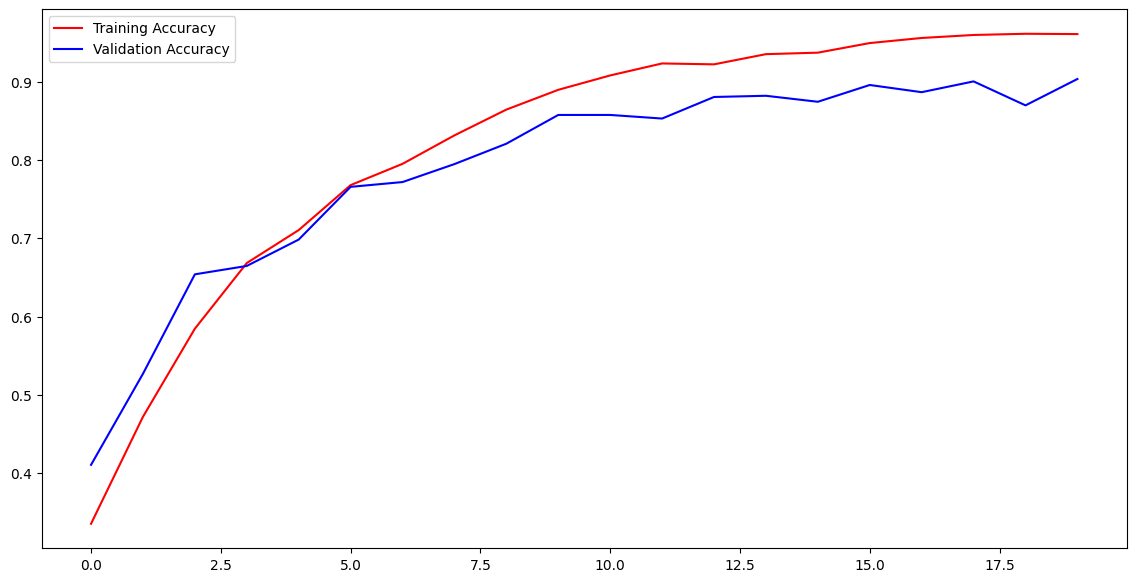

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

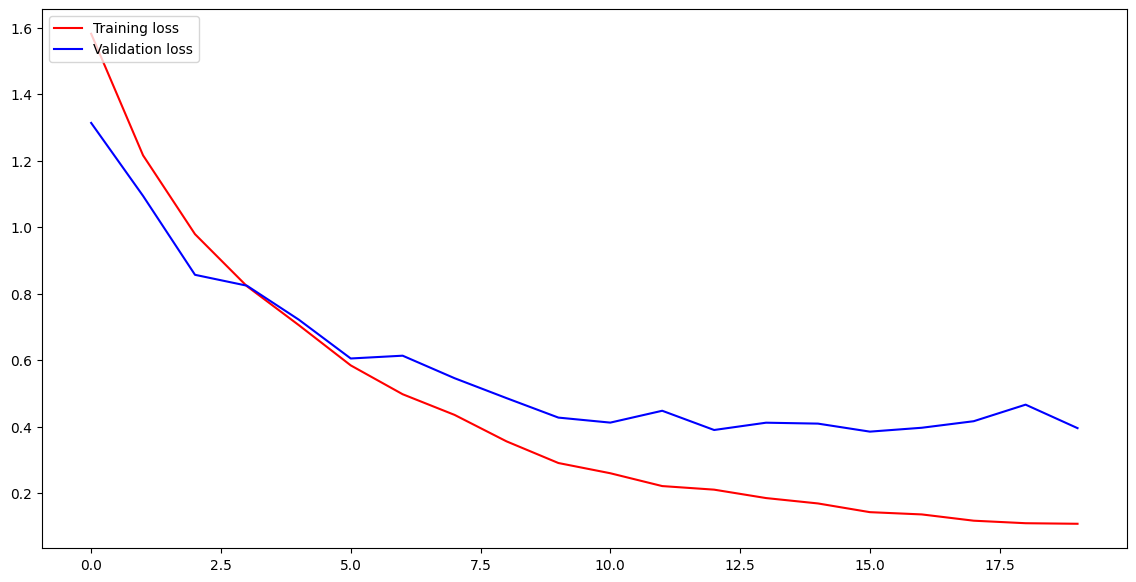

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

### Prediction

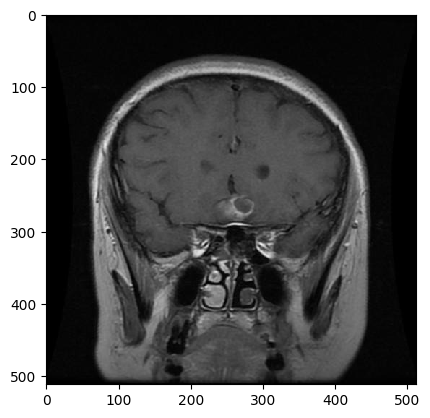

In [ ]:
from keras.preprocessing import image
img = image.load_img('data/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
img = cv2.imread('data/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(128,128))
img_array = np.array(img)
img_array.shape

(128, 128, 3)

In [ ]:
img_array = img_array.reshape(1,128,128,3)
img_array.shape

(1, 128, 128, 3)

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
print("The predicted class is", classes[indices])

1/1 [==============================] - 0s 73ms/step
The predicted class is pituitary_tumor
